In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
import yfinance as yf
import datetime as dt

stock = "NVDA"
start = dt.datetime(2021, 12, 24)
end = dt.datetime(2024, 12, 25)

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2021-12-27,30.893620,31.035384,29.590786,29.610753,403686000
2021-12-28,30.271654,31.277980,29.962167,31.260010,420591000
2021-12-29,29.951185,30.497278,29.317239,30.222735,343139000
2021-12-30,29.536877,30.406431,29.490954,29.777476,308864000
2021-12-31,29.362164,29.980137,29.282296,29.624727,266530000


In [4]:
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-12-18,128.910004,136.699997,128.279999,133.860001,277444500
2024-12-19,130.679993,134.029999,129.550003,131.759995,209719200
2024-12-20,134.699997,135.279999,128.220001,129.809998,306528600
2024-12-23,139.669998,139.789993,135.119995,136.279999,176053500
2024-12-24,140.220001,141.899994,138.649994,140.000000,105157000


In [5]:
data.shape

(754, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2021-12-27 to 2024-12-24
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, NVDA)   754 non-null    float64
 1   (High, NVDA)    754 non-null    float64
 2   (Low, NVDA)     754 non-null    float64
 3   (Open, NVDA)    754 non-null    float64
 4   (Volume, NVDA)  754 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB


In [7]:
data.isnull().sum()

Price   Ticker
Close   NVDA      0
High    NVDA      0
Low     NVDA      0
Open    NVDA      0
Volume  NVDA      0
dtype: int64

In [8]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
count,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,53.795762,54.804966,52.699872,53.803381,4.654494e+08
std,41.758542,42.522881,40.959045,41.838438,1.655455e+08
min,11.215970,11.723472,10.802376,10.960221,1.051570e+08
25%,19.565299,20.029856,18.969057,19.505064,3.633662e+08
50%,41.258673,42.129612,40.557587,41.376420,4.507785e+08
75%,87.088894,88.770490,85.706214,87.141880,5.502148e+08
max,148.869751,152.879470,146.249911,149.339720,1.543911e+09


In [9]:
data = data.reset_index()

data.columns

MultiIndex([(  'Date',     ''),
            ( 'Close', 'NVDA'),
            (  'High', 'NVDA'),
            (   'Low', 'NVDA'),
            (  'Open', 'NVDA'),
            ('Volume', 'NVDA')],
           names=['Price', 'Ticker'])

In [10]:
# Condlestick data plot
import plotly.graph_objects as go

In [11]:

plot = go.Figure(data=[go.Candlestick(x=data['Date'], open = data['Open'], close = data['Close'], high = data['High'], low = data['Low'])])

plot.update_layout(title = 'Stock Price Chart', xaxis_title = 'Date', yaxis_title = 'Price')
plot.show()

In [12]:
csv_data = data.to_csv("nvidia.csv")

csv_data_reader = pd.read_csv("nvidia.csv")

plot2 = go.Figure(data=[go.Candlestick(x=csv_data_reader['Date'], open = csv_data_reader['Open'], close = csv_data_reader['Close'], high = csv_data_reader['High'], low = data['Low'])])

plot2.update_layout(xaxis_rangeslider_visible=False)

plot2.show()

In [13]:
df = data.drop(['Date', 'Close'], axis = 1)

C:\Users\hector\AppData\Local\Temp\ipykernel_45904\1832783415.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [14]:
df.tail()

Price,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA
749,136.699997,128.279999,133.860001,277444500
750,134.029999,129.550003,131.759995,209719200
751,135.279999,128.220001,129.809998,306528600
752,139.789993,135.119995,136.279999,176053500
753,141.899994,138.649994,140.000000,105157000


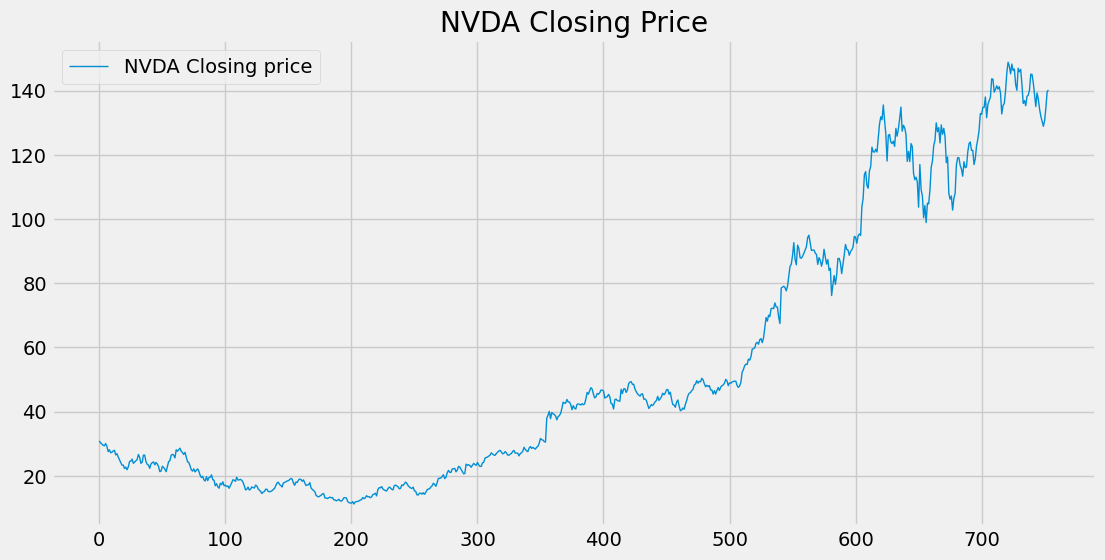

In [15]:
# CLOSING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = f'{stock} Closing price', linewidth= 1)
plt.title(f'{stock} Closing Price')
plt.legend()
plt.show()

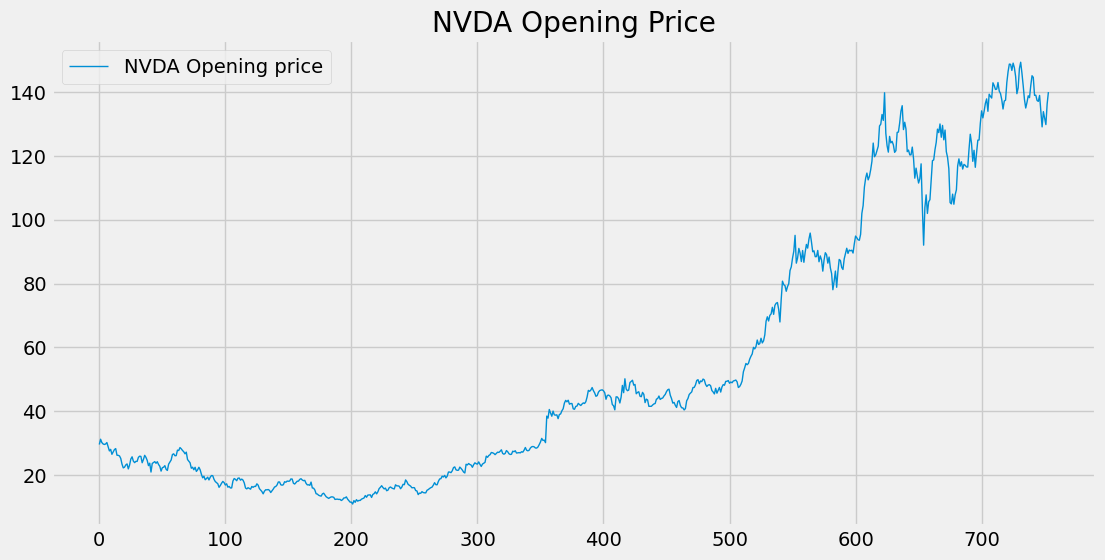

In [16]:
# OPENING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Open'], label = f'{stock} Opening price', linewidth= 1)
plt.title(f'{stock} Opening Price')
plt.legend()
plt.show()

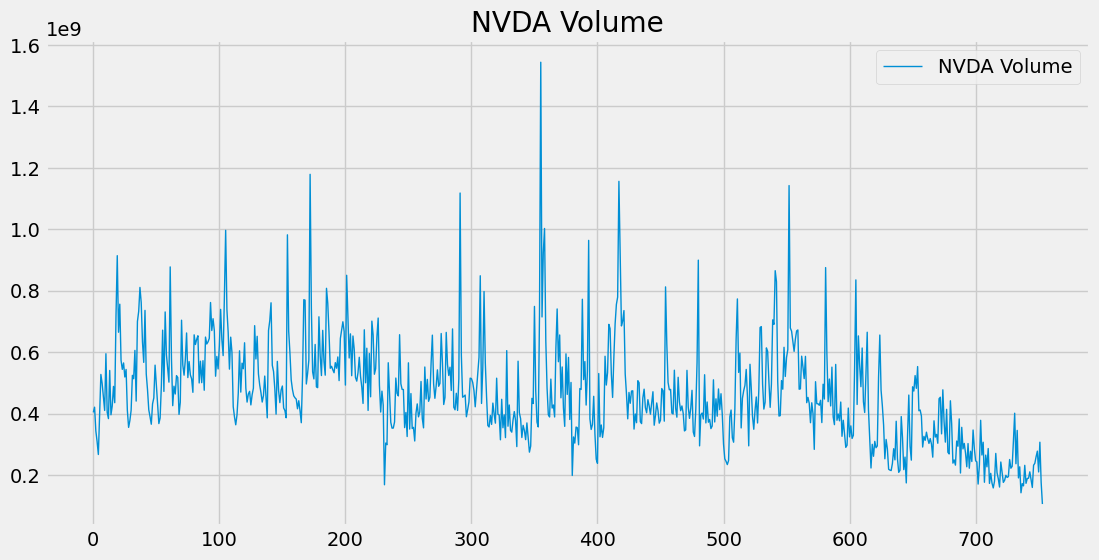

In [17]:
# VOLUME OVER TIME


plt.figure(figsize=(12,6))
plt.plot(data['Volume'], label = f'{stock} Volume', linewidth= 1)
plt.title(f'{stock} Volume')
plt.legend()
plt.show()

In [18]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [19]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [20]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [21]:
data_rolled_100 = data.Close.rolling(100).mean()
data_rolled_200 = data.Close.rolling(200).mean()

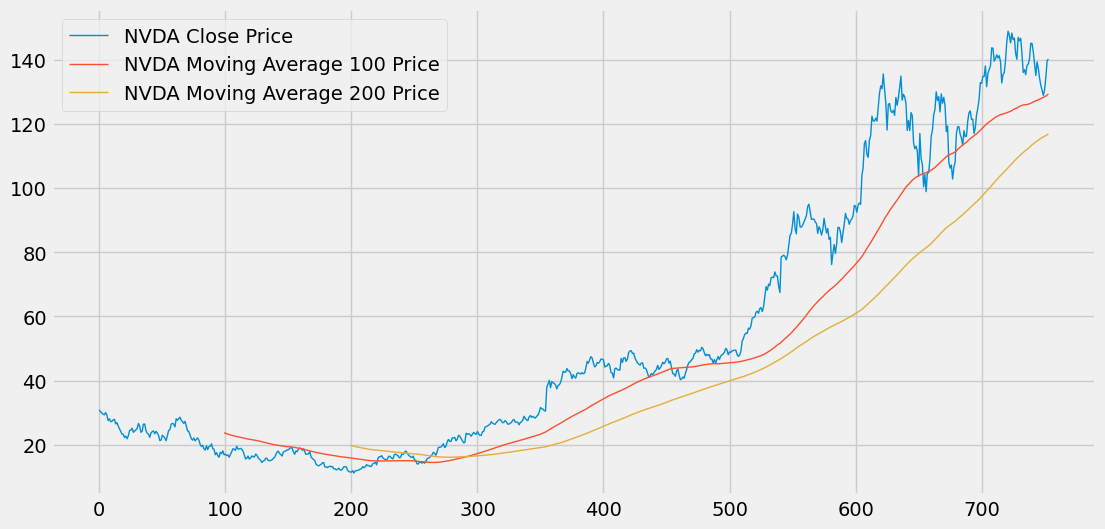

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(data_rolled_100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(data_rolled_200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [23]:
ema100 = data.Close.ewm(span=100, adjust = False).mean()
ema200 = data['Close'].ewm(span=200, adjust = False).mean()

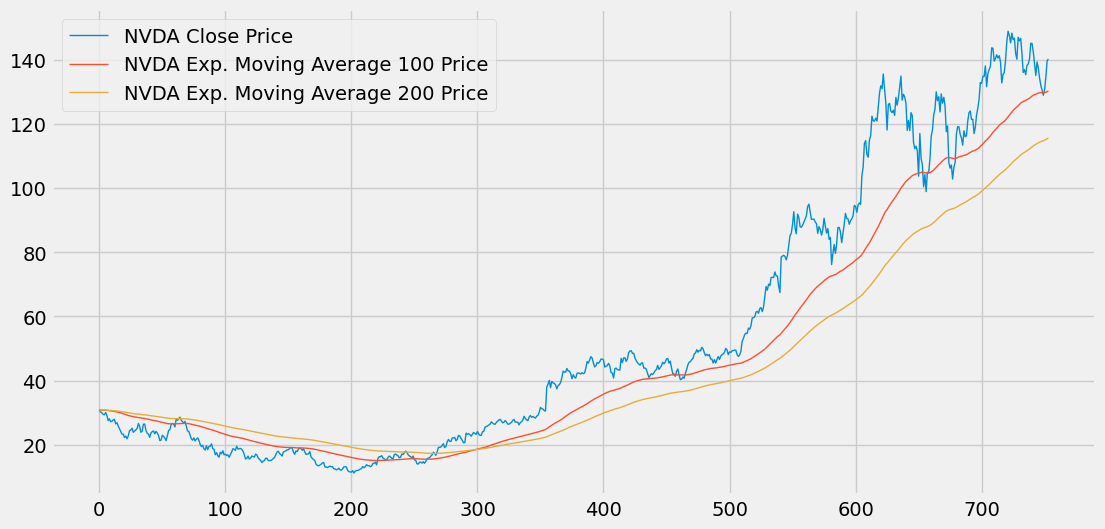

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [25]:
# CREATE THE MODEL

data_training = pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing = pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])

In [26]:
data_training.shape

(527, 1)

In [27]:
data_testing.shape

(227, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [29]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape[0]

527

In [30]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape

(427, 100, 1)

In [33]:
# CREATE MODEL

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - loss: 0.0072
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0081
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0077
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0055
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0056
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0052
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0067
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0060
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0056
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0051
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0053
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0041
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0048
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0062
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0044
Epoc

In [41]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

Ticker,NVDA
0,45.555077
1,45.161221
2,44.853336
3,45.468109
4,45.564075


In [50]:
input_data = scaler.fit_transform(final_df)

In [52]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [54]:
x_test.shape

(227, 100, 1)

In [56]:
y_predicted = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [59]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

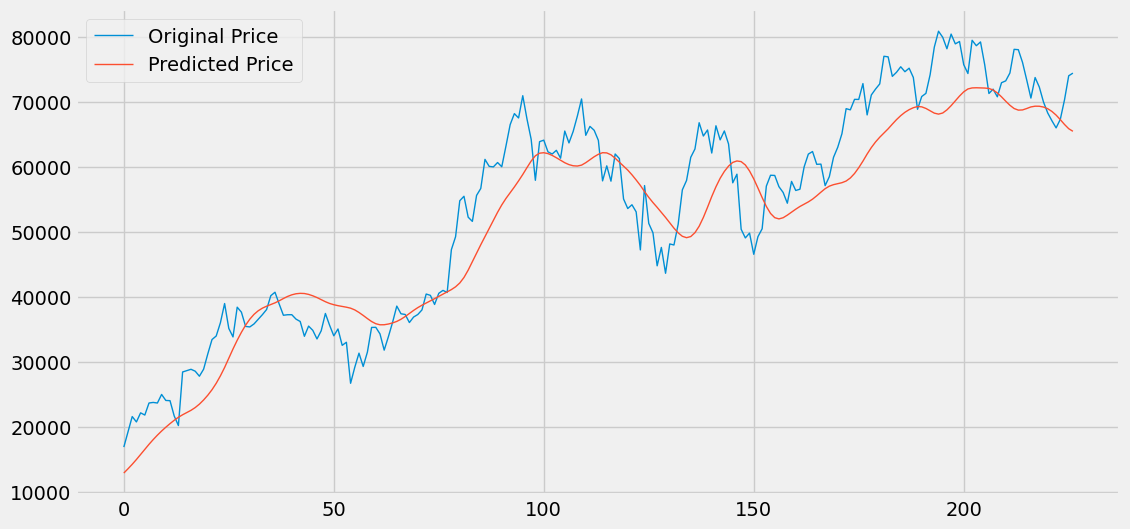

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [62]:
model.save('stock_dl_model.h5')